In [98]:
from my_cluster import myCluster
from sklearn.datasets import load_iris

In [99]:
iris = load_iris()
X = iris.data

In [100]:
model = myCluster(X, 3, 1)

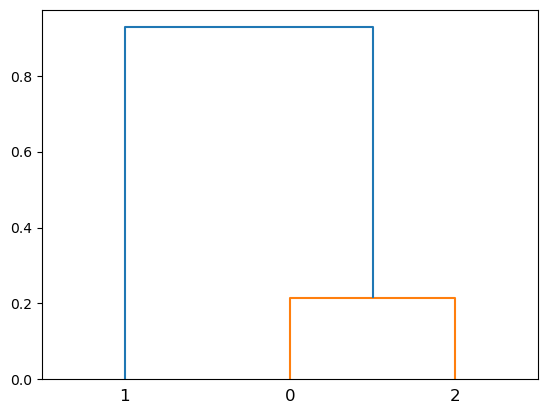

In [101]:
model.plot_dendrogram()

In [102]:
print(model.model.children_)

[[0 2]
 [1 3]]


In [103]:
# this method needs to get included to constructor!
model.agg_eigenvectors()

In [104]:
print(model.hierarchy)

[{'eigenvectors': array([[-0.62409833],
       [-0.2906606 ],
       [-0.6900076 ],
       [-0.22339921]]), 'id': 0, 'parents': 'leaf', 'layer': 0}, {'eigenvectors': array([[-0.6690784 ],
       [-0.73414783],
       [-0.0965439 ],
       [-0.06356359]]), 'id': 1, 'parents': 'leaf', 'layer': 0}, {'eigenvectors': array([[-0.71671768],
       [-0.10239454],
       [-0.6585126 ],
       [-0.20540758]]), 'id': 2, 'parents': 'leaf', 'layer': 0}, {'eigenvectors': array([[-0.67040801],
       [-0.19652757],
       [-0.6742601 ],
       [-0.2144034 ]]), 'id': 3, 'parents': (0, 2), 'layer': 1}, {'eigenvectors': array([[-0.6697432],
       [-0.4653377],
       [-0.385402 ],
       [-0.1389835]]), 'id': 4, 'parents': (1, 3), 'layer': 2}]


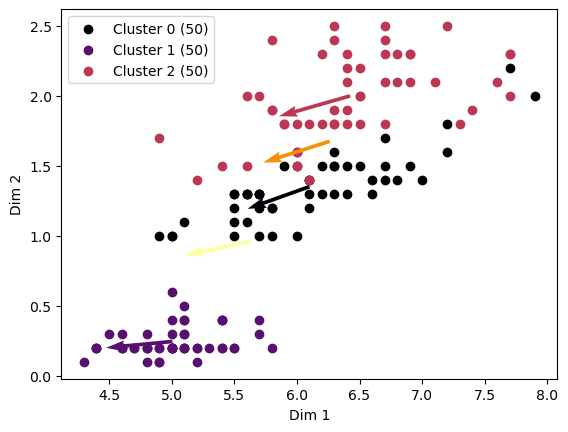

In [105]:
model.plot_2d_scatter(0, 3)